<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [3]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = './estados-brutos.xml'
with open(NOME_ARQUIVO_FONTE, 'r', encoding='utf8') as arquivo:
    conteudo = arquivo.read()
fonte = BeautifulSoup(conteudo, 'lxml')

/usr/local/lib/python3.10/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [4]:
display(fonte)

<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

In [5]:
estados= list(map(lambda x: x.text,fonte.find_all('nome')))
siglas = list(map(lambda x: x.text,fonte.find_all('sigla')))
regiaos = list(map(lambda x: x.text,fonte.find_all('regiao')))

In [6]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'
with open(file=f'./{NOME_ARQUIVO_DESTINO}', mode='w', encoding='utf8') as fp:
  fp.write('ESTADO,SIGLA,REGIAO\n')
  for estado, sigla,regiao in zip(estados,siglas,regiaos):
    fp.write(f'{estado},{sigla},{regiao}\n')


### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [8]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'

cidades_bruto_df = pd.read_csv(NOME_ARQUIVO_FONTE, sep=',')


In [ ]:
# visualize os resultados
cidades_bruto_df
# continue o codigo aqui

In [11]:
# manipule os dados
cidades_bruto_2010_df= cidades_bruto_df.query('Censo == 2010')
cidades_bruto_limpo_df = cidades_bruto_2010_df[['UF', 'nome', 'PIB', 'Pop_est_2009', 'PIB_percapita']]
cidades_bruto_limpo_df

,UF,nome,PIB,Pop_est_2009,PIB_percapita
0,BAHIA,Tremedal,5.788399e+04,18433,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4.572388e+04,4000,11430.969727
2,ESPIRITO SANTO,Vitória,1.978263e+07,320156,61790.589844
3,MINAS GERAIS,Jacutinga,2.478160e+05,21424,11567.209961
4,PIAUÍ,Nazária,2.095138e+04,7895,2653.750000
...,...,...,...,...,...
5561,SANTA CATARINA,Campo Erê,1.876289e+05,9737,19269.679688
5562,PARANÁ,Planalto,1.385535e+05,13983,9908.709961
5563,SÃO PAULO,Guararapes,5.320191e+05,29639,17949.970703
5564,RIO GRANDE DO SUL,Barra do Guarita,2.198064e+04,3067,7166.819824


In [12]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'

# continue o codigo aqui

cidades_bruto_limpo_df.to_csv(NOME_ARQUIVO_DESTINO,index=False)
print('sucesso na operaçao')

sucesso na operaçao


### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-bruto.csv` com os dados do arquivo `cidades-bruto.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [ ]:
# solução do exercício 1.3
import pandas as pd
cidades_df = pd.read_csv('cidades-limpo.csv', ',')
estados_df = pd.read_csv('estados-limpo.csv',',')
#retirando acento dos nomes dos estados para para não gerar valores nulos
cidades_df['UF'] = cidades_df['UF'].apply(lambda linha: linha.replace('Á', 'A').replace('Ã', 'A').replace('Ã', 'A').replace('Í', 'I').replace('Ô', 'O'))
#transformando o estado em UF para nao da NaN na combinaçao
estados_df = estados_df.rename(columns={'ESTADO':'UF'})
#combinando
estadoscidades_df = pd.merge(left=cidades_df, right=estados_df, on='UF', how='outer')
estadoscidades_df.isnull().any().any()
estadoscidades_df.to_csv('./brasil.csv',index=False )

---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [81]:
# solução do exercício 2.1
brasil_df= pd.read_csv('brasil.csv', sep=',')

### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [82]:
# código para responder a pergunta
populosas =brasil_df.sort_values(ascending=False, by= 'Pop_est_2009').head(10).reset_index()
populosas

,index,UF,nome,PIB,Pop_est_2009,PIB_percapita,SIGLA,REGIAO
0,3271,SAO PAULO,São Paulo,389317152.0,11037593,35271.929688,SP,SUDESTE
1,4504,RIO DE JANEIRO,Rio de Janeiro,175739344.0,6186710,28405.949219,RJ,SUDESTE
2,44,BAHIA,Salvador,32824228.0,2998056,10948.500000,BA,NORDESTE
3,5554,DISTRITO FEDERAL,Brasília,131487264.0,2606885,50438.460938,DF,CENTRO-OESTE
4,4221,CEARA,Fortaleza,31789186.0,2505552,12687.500000,CE,NORDESTE
5,1735,MINAS GERAIS,Belo Horizonte,44595204.0,2452617,18182.699219,MG,SUDESTE
6,4849,PARANA,Curitiba,45762420.0,1851215,24720.210938,PR,SUL
7,3720,AMAZONAS,Manaus,40486108.0,1738641,23286.060547,AM,NORTE
8,2435,PERNAMBUCO,Recife,24835340.0,1561659,15903.179688,PE,NORDESTE
9,2624,PARA,Belém,16526989.0,1437600,11496.240234,PA,NORTE


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [83]:
# código para responder a pergunta
pouca_populosa = brasil_df.sort_values(ascending=True, by= 'PIB_percapita').head(5).reset_index()
pouca_populosa

,index,UF,nome,PIB,Pop_est_2009,PIB_percapita,SIGLA,REGIAO
0,4464,MARANHAO,São Vicente Ferrer,39492.960938,20463,1929.969971,MA,NORDESTE
1,2592,PARA,Jacareacanga,80748.671875,41487,1946.359985,PA,NORTE
2,2600,PARA,Curralinho,55652.523438,27543,2020.569946,PA,NORTE
3,2638,PARA,Faro,40236.570312,19585,2054.459961,PA,NORTE
4,4359,MARANHAO,Cajapió,22781.035156,10337,2203.830078,MA,NORDESTE


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [ ]:
# código para responder a pergunta
maior_pib_sp = brasil_df.query(' UF == "SAO PAULO" ')
maior_pib_sp = maior_pib_sp.sort_values(ascending=False, by= 'PIB').head(15).reset_index()
maior_pib_sp

 - Qual é o PIB do estado de Santa Catarina?

In [93]:
# código para responder a pergunta
sc = brasil_df.loc[brasil_df['UF'] == 'SANTA CATARINA']
sc['PIB'].sum()

129806256.75195317

 - Qual é o população da região sul?

In [99]:
# código para responder a pergunta
regiao_sul = brasil_df.query('REGIAO == "SUL"')
regiao_sul['Pop_est_2009'].sum()

27719118

 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [101]:
# código para responder a pergunta
cid_ms = brasil_df.query('UF == "MATO GROSSO DO SUL"')
cid_ms['PIB'].mean()

466257.6111278045

 - Qual é a população do Brasil?

In [102]:
# código para responder a pergunta
brasil_df['Pop_est_2009'].sum()

191176146

### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

<Axes: xlabel='Pop_est_2009', ylabel='nome'>

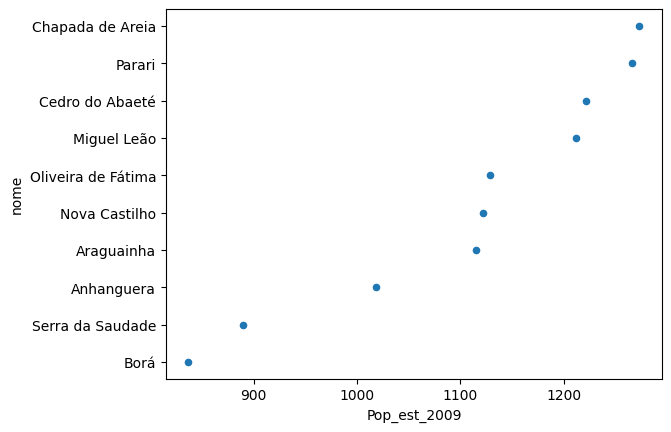

In [106]:
# código para gerar a visualização
menos_pop = brasil_df.sort_values(ascending=True, by= 'Pop_est_2009').head(10).reset_index()
menos_pop.plot.scatter(x='Pop_est_2009',  y='nome')

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

<Axes: title={'center': 'Proporção da população do Brasil por região'}, ylabel='Pop_est_2009'>

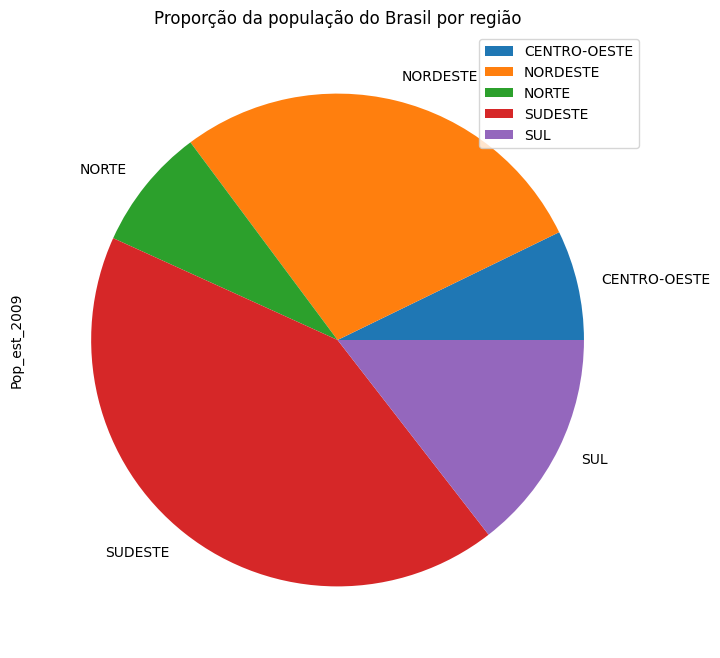

In [113]:
# código para gerar a visualização
por_pr = brasil_df[['REGIAO', 'Pop_est_2009']]
por_pr.groupby('REGIAO').agg('sum').plot.pie(y='Pop_est_2009', figsize=(11, 8), title='Proporção da população do Brasil por região')